<a href="https://colab.research.google.com/github/Bertha-ding/20MA573-yuning-ding/blob/master/hw/hw6-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

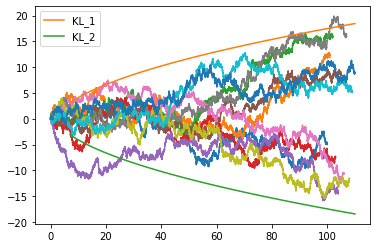

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math  
def Bpath(T,N):
  sum_list = [0]                          
  h = T/N                              
  wi = 0
  for i in range(N):
    Z = np.random.normal(0,1)
    wi += np.sqrt(h) * Z
    sum_list.append(wi)
  return sum_list
def plot(T,N):
  x0 = [x*T/N for x in range(N+1)]
  y0 = Bpath(T,N)
  return plt.plot(x0,y0)
for t in range(300,311):
  plot(t,int(t/0.01)); 
a = list(range(int(math.e**2),311))
kl1 = [math.sqrt(2*x*math.log(math.log(x))) for x in a] 
kl2 = [-x for x in kl1]
plt.plot(a,kl1,label = 'loglog_1');
plt.plot(a,kl2,label = 'loglog_2');
plt.legend();

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as so
import scipy.stats as ss

class VanillaOption:
    def __init__(
        self,
        otype = 1, # 1: 'call'
                  # -1: 'put'
        strike = 110.,
        maturity = 1.,
        market_price = 10.):
      self.otype = otype
      self.strike = strike
      self.maturity = maturity
      self.market_price = market_price
class Gbm:
    def __init__(self, init_state = 100.,
                 drift_ratio = .0475,
                 vol_ratio = .2,
                 nstep = 5,
                 N = 1000):
        self.init_state = init_state
        self.drift_ratio = drift_ratio
        self.vol_ratio = vol_ratio
        self.nstep = nstep
        self.N = N                                      # The number of trials

    def arasian(self,Vanillaoption):
      s0 = self.init_state
      o = self.vol_ratio
      r = self.drift_ratio
      n = self.nstep
      N = self.N      
      otype = Vanillaoption.otype
      k = Vanillaoption.strike
      T = Vanillaoption.maturity
      sum1 = 0
      for i in range(N):
        t = np.linspace(0, T, n+1)                  
        h = T/n
        W = np.zeros(n+1)
        for j in range(n):
          W[j+1] = W[j] + np.sqrt(h) * np.random.normal(0,1)   
        S = s0 * np.exp((r - o**2/2.) * t + o * W)  
        average = np.mean(S)
        sum1 += np.exp(-r*T)*np.max([average-k, 0])
      return sum1/N
gbm1 = Gbm()
option1 = VanillaOption()
gbm1.arasian(option1)

1.53108743283559